In [631]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns=None
import warnings
warnings.filterwarnings('ignore')

### train dataset

In [632]:
train=pd.read_csv('train.csv')
train.head(3)

,ID,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,labour_union,self_country,major_occ_code,age,mother_country,house_summary,gender,hisp_origin,gains,dividends,marriage_status,losses,employer_of,house_1yr_ago,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job,income
0,0,2004,0,2,High school,White,United-States,Associates degree-academic program,Householder,Business and repair services,no,United-States,Protective services,42,United-States,Householder,M,All_Other,0.0,0.0,Married_civilian_Sp_Pr,0.0,1,No,No,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,More than 50K $
1,1,2005,0,0,College/University,White,Japan,Children,Child <18 never marr not in subfamily,Not in universe or children,NaN,United-States,NaN,10,United-States,Child_U18_Unmarried,M,Mex_Amer,0.0,0.0,Unmarried,0.0,0,NaN,No,0,Both_Pr,0.0,NaN,NB_US,NaN,Nonfiler,Children/Armed_Forces,More than 50K $
2,2,2004,0,2,NaN,White,United-States,Some college but no degree,Secondary individual,Manufacturing-durable goods,NaN,United-States,Machine operators assmblrs & inspctrs,46,United-States,Non_Relative,M,All_Other,0.0,0.0,Divorced,0.0,6,No,Yes,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces,More than 50K $


In [633]:
train.set_index('ID',inplace=True)

### train dataset shape

In [634]:
train.shape

(105000, 33)

### test dataset

In [758]:
test=pd.read_csv('test.csv')
test.head(3)

,ID,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,labour_union,self_country,major_occ_code,age,mother_country,house_summary,gender,hisp_origin,gains,dividends,marriage_status,losses,employer_of,house_1yr_ago,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job
0,105000,2005,0,2,College/University,White,United-States,Some college but no degree,Householder,Manufacturing-nondurable goods,NaN,United-States,Precision production craft & repair,32.0,United-States,Householder,M,All_Other,0.0,0.0,Married_civilian_Sp_Pr,0.0,6,NaN,No,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Full-time schedules
1,105001,2004,0,2,College/University,White,United-States,Bachelors degree(BA AB BS),Nonfamily householder,Medical except hospital,NaN,United-States,Professional specialty,51.0,United-States,Householder,F,All_Other,0.0,120.0,Unmarried,0.0,6,Yes,NaN,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces
2,105002,2004,0,2,NaN,White,United-States,7th and 8th grade,In group quarters,Not in universe or children,no,United-States,NaN,70.0,United-States,Sy_Individual,F,All_Other,0.0,0.0,Widowed,0.0,0,Yes,NaN,0,NaN,0.0,NaN,NB_US,NaN,Nonfiler,Children/Armed_Forces


### test shape

In [759]:
test.shape

(42000, 33)

### data types 

In [637]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105000 entries, 0 to 104999
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year_of_poll        105000 non-null  int64  
 1   own_self_emp        105000 non-null  int64  
 2   veteran benefits    105000 non-null  int64  
 3   currently_enrolled  73557 non-null   object 
 4   race                105000 non-null  object 
 5   father_country      105000 non-null  object 
 6   educ                105000 non-null  object 
 7   house_stat          104989 non-null  object 
 8   major_ind_code      105000 non-null  object 
 9   labour_union        69669 non-null   object 
 10  self_country        105000 non-null  object 
 11  major_occ_code      51945 non-null   object 
 12  age                 105000 non-null  int64  
 13  mother_country      105000 non-null  object 
 14  house_summary       105000 non-null  object 
 15  gender              105000 non-nul

## DATA CLEANING

### data type conversions

In [638]:
train['own_self_emp']=train['own_self_emp'].astype('object')
train['veteran benefits']=train['veteran benefits'].astype('object')

In [760]:
test['own_self_emp']=test['own_self_emp'].astype('object')
test['veteran benefits']=test['veteran benefits'].astype('object')

In [640]:
test['year_of_poll']=test['year_of_poll'].astype('object')
train['year_of_poll']=train['year_of_poll'].astype('object')

### five point summary

In [641]:
train.describe(include=[np.number])

,age,gains,dividends,losses,employer_of,weeks_worked,hourly_wage
count,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000
mean,36.243924,488.464764,240.232046,25.321047,1.953057,20.898371,93.484943
std,23.465922,5284.877430,2501.629980,186.824899,2.361890,22.041670,461.214547
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,35.000000,0.000000,0.000000,0.000000,1.000000,7.000000,0.000000
75%,52.000000,0.000000,0.000000,0.000000,4.000000,47.000000,0.000000
max,94.000000,109998.900000,119998.800000,3225.600000,6.000000,47.000000,16998.300000


In [642]:
train.describe(include=[np.object]).T

,count,unique,top,freq
year_of_poll,105000,2,2005,52532
own_self_emp,105000,3,0,95004
veteran benefits,105000,3,2,79143
currently_enrolled,73557,2,College/University,42386
race,105000,5,White,88078
father_country,105000,43,United-States,83720
educ,105000,17,High school graduate,25608
house_stat,104989,31,Householder,28081
major_ind_code,105000,24,Not in universe or children,53055
labour_union,69669,2,no,59270


### not null check

In [643]:
tr_null=(train.isnull().sum() / len(train)) *100
tr_null[tr_null>0]

currently_enrolled    29.945714
house_stat             0.010476
labour_union          33.648571
major_occ_code        50.528571
house_1yr_ago         50.782857
income_filled         30.860000
under18               72.396190
unemp_reason          96.962857
woker_type            50.319048
full_partime_job       1.325714
dtype: float64

In [761]:
te_null=(test.isnull().sum() / len(test)) *100
te_null[te_null>0]

currently_enrolled    30.030952
house_stat             0.007143
labour_union          34.135714
major_occ_code        50.161905
age                    1.419048
house_1yr_ago         50.947619
income_filled         30.971429
under18               72.238095
unemp_reason          96.940476
woker_type            49.945238
full_partime_job       1.352381
dtype: float64

### Anomalies check 

In [762]:
nutes=test.select_dtypes(include=[np.number])
obtes=test.select_dtypes(include=[np.object])

obj=train.select_dtypes(include=[np.object])
num=train.select_dtypes(include=[np.number])

In [646]:
for i in obj.columns:
    print(i,' : ')
    print()
    print(obj[i].value_counts())
    print()
    print('**************************************************')

year_of_poll  : 

2005    52532
2004    52468
Name: year_of_poll, dtype: int64

**************************************************
own_self_emp  : 

0    95004
2     8568
1     1428
Name: own_self_emp, dtype: int64

**************************************************
veteran benefits  : 

2    79143
0    24826
1     1031
Name: veteran benefits, dtype: int64

**************************************************
currently_enrolled  : 

College/University    42386
 High school          31171
Name: currently_enrolled, dtype: int64

**************************************************
race  : 

 White                      88078
 Black                      10763
Asian/Pacific_Islander       3050
 Other                       1935
Amer/Indian/Aleut/Eskimo     1174
Name: race, dtype: int64

**************************************************
father_country  : 

 United-States                   83720
 Mexico                           5297
 ?                                3523
 Puerto-Rico            

In [647]:
len(train[train['father_country']==' ?'])

3523

In [763]:
len(test[test['father_country']==' ?'])

1392

In [649]:
len(train[train['self_country']==' ?'])

1806

In [764]:
len(test[test['self_country']==' ?'])

690

In [651]:
len(train[train['mother_country']==' ?'])

3243

In [765]:
len(test[test['mother_country']==' ?'])

1249

### Inference :
          > Based on our above observation the categorical columns with respect to country has few ? we dont knw what it belongs to so we can impute them into null and do the further required cleanings .

In [653]:
for i in num.columns:
    print(i)
    print(num[i].unique())
    print()
    print('*************************************')

age
[42 10 46 35 61  7 20 34 75 59 12 48 55 77 72 32 43  1 36  0 25 41 81 26
 38 14 45 28 52 39 29  5 24 13 33 17 19 22 78 84 30 23  2  3  6 21 62 16
 90 79 67 27 49  8 74 15 65 18 47 80 66 51 37 68 86 70 58 85 60 44 63 40
 82  4 57 54 56 69  9 87 50 76 64 88 83 71 94 93 89 92 91]

*************************************
gains
[     0.    5514.3   8027.8   3413.3   1160.5   2255.    5695.8 109998.9
   1090.1   2209.9   3657.5   8456.8   4470.4    441.1   3260.4   4857.6
  17414.1   2268.2   3173.5   2918.3   1549.9  10324.6   2315.5  11665.5
  11572.    5115.    3759.8  30610.8   1194.6   3111.9  22056.1   1976.7
   2589.4  16526.4   8187.3   8173.    4336.2   9475.4   7165.4   2561.9
   5424.1   6111.6   7533.9   2791.8  27636.4   8775.8  12845.8    653.4
   1222.1   5265.7   2647.7   4824.6   2239.6   3801.6   1904.1   4159.1
   2450.8   3752.1   4199.8   2032.8   4275.7   7395.3   4958.8   2422.2
   2709.3   7146.7   3818.1   4511.1   5351.5   4041.4  15778.4   2519.
   1600.5   3197.

### Treating anomalies

In [654]:
train['father_country'] = train['father_country'].replace({' ?':np.nan})
train['self_country'] = train['self_country'].replace({' ?':np.nan})
train['mother_country'] = train['mother_country'].replace({' ?':np.nan})

In [766]:
test['father_country'] = test['father_country'].replace({' ?':np.nan})
test['self_country'] = test['self_country'].replace({' ?':np.nan})
test['mother_country'] = test['mother_country'].replace({' ?':np.nan})

In [656]:
tr_null=(train.isnull().sum() / len(train)) *100
tr_null[tr_null>0]

currently_enrolled    29.945714
father_country         3.355238
house_stat             0.010476
labour_union          33.648571
self_country           1.720000
major_occ_code        50.528571
mother_country         3.088571
house_1yr_ago         50.782857
income_filled         30.860000
under18               72.396190
unemp_reason          96.962857
woker_type            50.319048
full_partime_job       1.325714
dtype: float64

In [767]:
te_null=(test.isnull().sum() / len(test)) *100
te_null[te_null>0]

currently_enrolled    30.030952
father_country         3.314286
house_stat             0.007143
labour_union          34.135714
self_country           1.642857
major_occ_code        50.161905
age                    1.419048
mother_country         2.973810
house_1yr_ago         50.947619
income_filled         30.971429
under18               72.238095
unemp_reason          96.940476
woker_type            49.945238
full_partime_job       1.352381
dtype: float64

### null value Imputations 

In [658]:
tr_null[tr_null>50]

major_occ_code    50.528571
house_1yr_ago     50.782857
under18           72.396190
unemp_reason      96.962857
woker_type        50.319048
dtype: float64

In [768]:
te_null[te_null>50]

major_occ_code    50.161905
house_1yr_ago     50.947619
under18           72.238095
unemp_reason      96.940476
dtype: float64

## Inference :
    > Based on the observations columns having more than 50% of null values can be dropped from the datasets .

In [660]:
train.drop(['major_occ_code','house_1yr_ago','under18','unemp_reason','woker_type'],axis=1,inplace=True)

In [769]:
test.drop(['major_occ_code','house_1yr_ago','under18','unemp_reason'],axis=1,inplace=True)

In [770]:
test.drop('woker_type',axis=1,inplace=True)

In [663]:
tr_null=(train.isnull().sum() / len(train)) *100
tr_null[tr_null>0]

currently_enrolled    29.945714
father_country         3.355238
house_stat             0.010476
labour_union          33.648571
self_country           1.720000
mother_country         3.088571
income_filled         30.860000
full_partime_job       1.325714
dtype: float64

In [771]:
te_null=(test.isnull().sum() / len(test)) *100
te_null[te_null>0]

currently_enrolled    30.030952
father_country         3.314286
house_stat             0.007143
labour_union          34.135714
self_country           1.642857
age                    1.419048
mother_country         2.973810
income_filled         30.971429
full_partime_job       1.352381
dtype: float64

## Inference :
    > Based on the columns which has null values more than 30% we can impute them with mean , median or mode based on the specified data types

In [665]:
train['currently_enrolled'].mode()

0    College/University
Name: currently_enrolled, dtype: object

In [666]:
train['labour_union'].mode()

0    no
Name: labour_union, dtype: object

In [667]:
train['income_filled'].mode()

0     No
Name: income_filled, dtype: object

In [668]:
train['currently_enrolled'] = train['currently_enrolled'].replace({np.nan:'College/University'})
train['labour_union'] = train['labour_union'].replace({np.nan:'no'})
train['income_filled'] = train['income_filled'].replace({np.nan:'No'})

In [772]:
test['currently_enrolled'] = test['currently_enrolled'].replace({np.nan:'College/University'})
test['labour_union'] = test['labour_union'].replace({np.nan:'no'})
test['income_filled'] = test['income_filled'].replace({np.nan:'No'})

## Inference:
    We can simply drop the null values which are less than 5% values 

In [670]:
tr_null=(train.isnull().sum() / len(train)) *100
tr_null[tr_null>0]

father_country      3.355238
house_stat          0.010476
self_country        1.720000
mother_country      3.088571
full_partime_job    1.325714
dtype: float64

In [773]:
te_null=(test.isnull().sum() / len(test)) *100
te_null[te_null>0]

father_country      3.314286
house_stat          0.007143
self_country        1.642857
age                 1.419048
mother_country      2.973810
full_partime_job    1.352381
dtype: float64

In [672]:
train=train.dropna()

In [774]:
test=test.dropna()

In [674]:
tr_null=(train.isnull().sum() / len(train)) *100
tr_null[tr_null>0]

Series([], dtype: float64)

In [775]:
te_null=(test.isnull().sum() / len(test)) *100
te_null[te_null>0]

Series([], dtype: float64)

### EDA AND DATA INSIGHTS

In [676]:
number1=train.select_dtypes(include=np.number)
number1.head(1)

,age,gains,dividends,losses,employer_of,weeks_worked,hourly_wage
ID,,,,,,,
0,42,0.0,0.0,0.0,1,47,0.0


In [677]:
object1=train.select_dtypes(include=np.object)
object1.head(1)

,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,labour_union,self_country,mother_country,house_summary,gender,hisp_origin,marriage_status,income_filled,citizenship,fed_liability,full_partime_job,income
ID,,,,,,,,,,,,,,,,,,,,,
0,2004,0,2,High school,White,United-States,Associates degree-academic program,Householder,Business and repair services,no,United-States,United-States,Householder,M,All_Other,Married_civilian_Sp_Pr,No,NB_US,Joint_both_under65,Children/Armed_Forces,More than 50K $


In [678]:
object1.shape

(99286, 21)

In [679]:
number1.head(1)

,age,gains,dividends,losses,employer_of,weeks_worked,hourly_wage
ID,,,,,,,
0,42,0.0,0.0,0.0,1,47,0.0


### Pie chart for categorical analysis

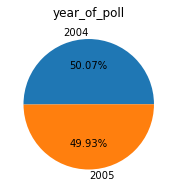

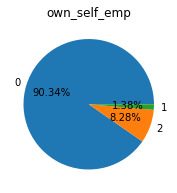

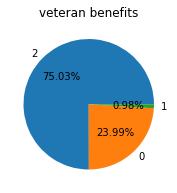

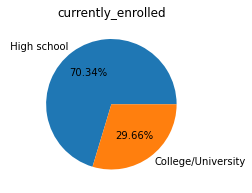

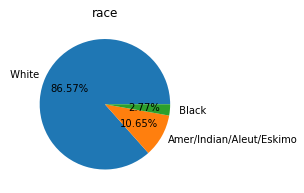

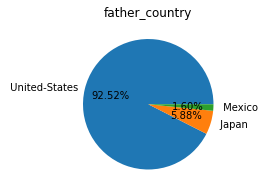

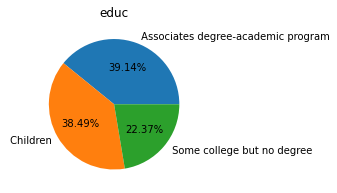

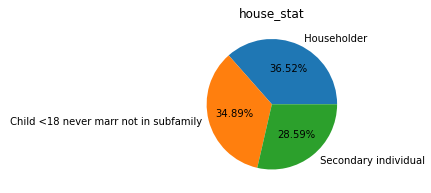

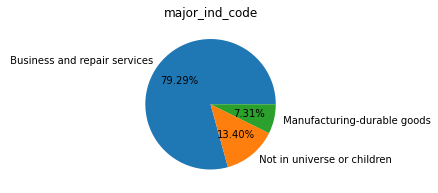

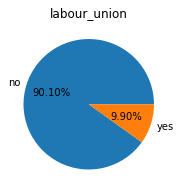

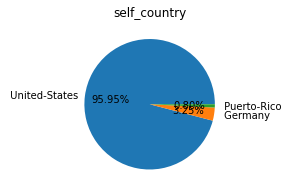

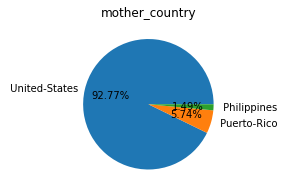

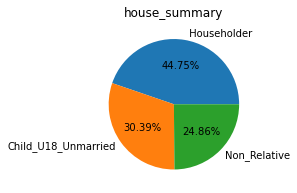

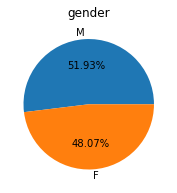

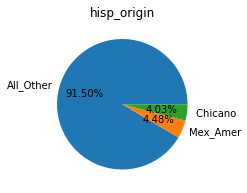

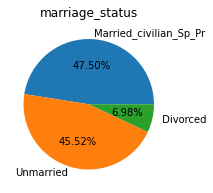

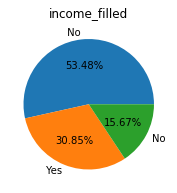

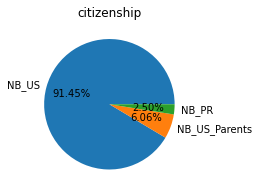

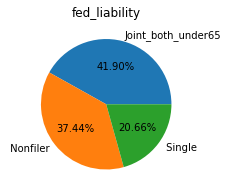

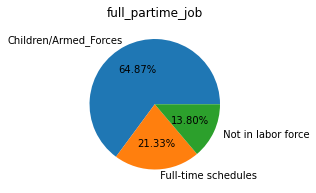

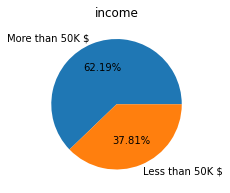

In [680]:
#plt.figure(figsize=(20,14))
for i,j in enumerate(object1.columns):
    plt.figure(figsize=(5,3))
    plt.title(j)
    plt.pie(train[j].value_counts()[:3],labels=train[j].unique()[:3],autopct='%1.2f%%',normalize=True)
plt.show()

### comparing categorical with target variables

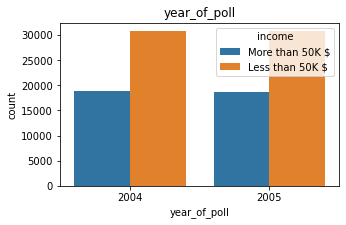

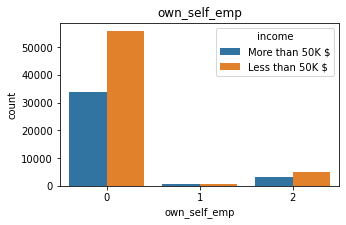

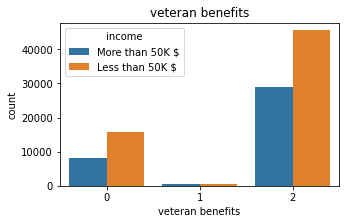

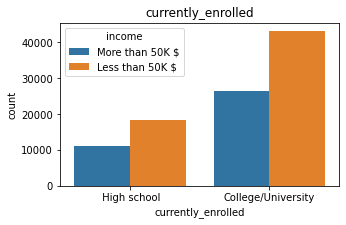

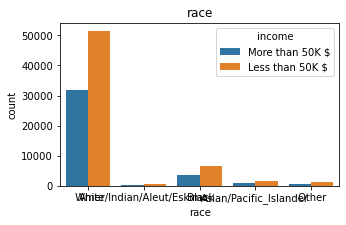

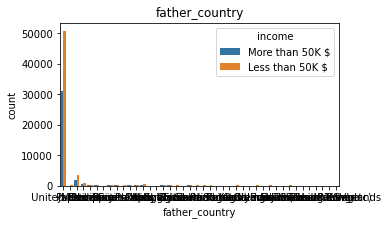

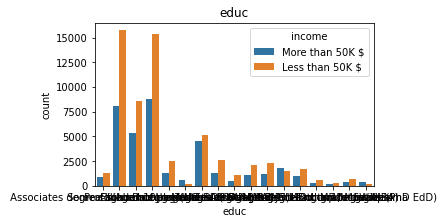

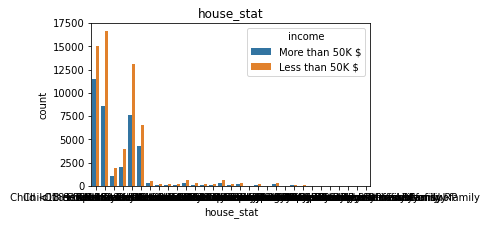

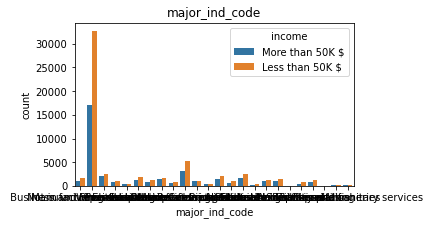

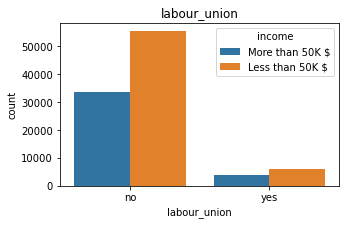

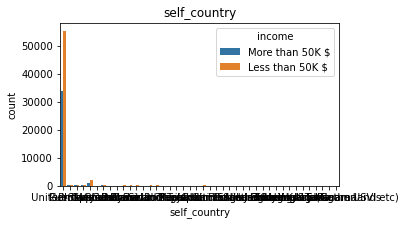

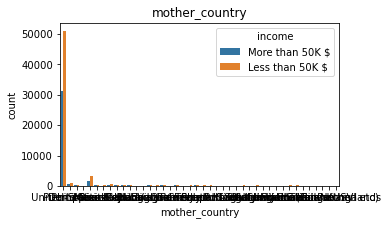

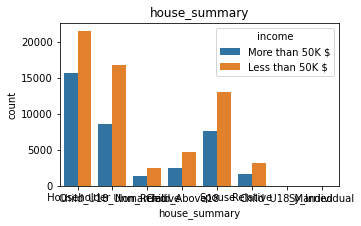

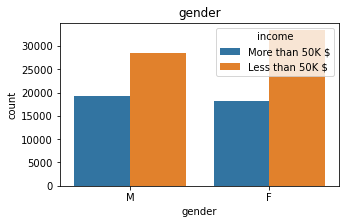

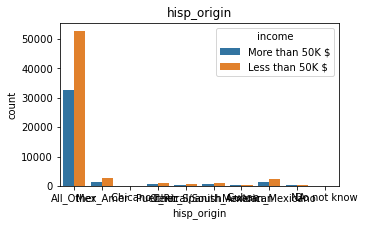

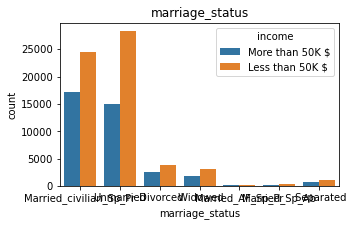

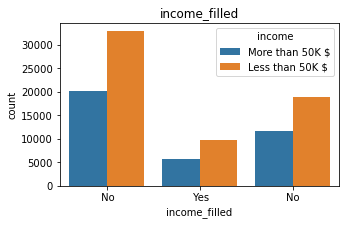

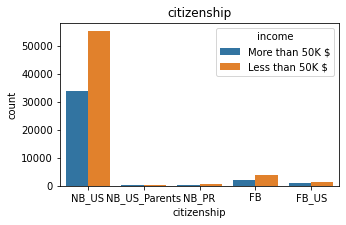

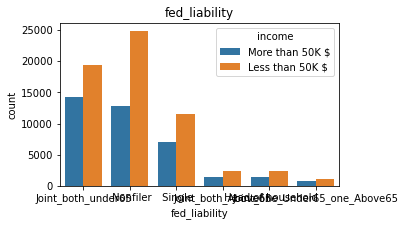

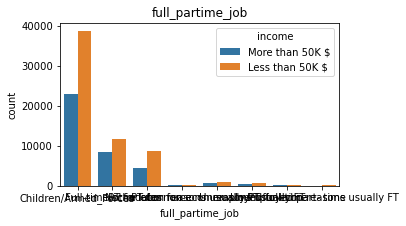

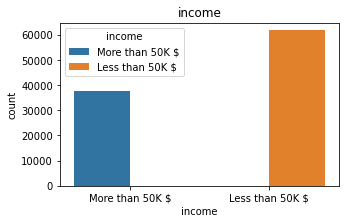

In [681]:
for i,j in enumerate(object1.columns):
    plt.figure(figsize=(5,3))
    plt.title(j)
    sns.countplot(train[j],hue=train['income'])
plt.show()

### bar chart for categorical features

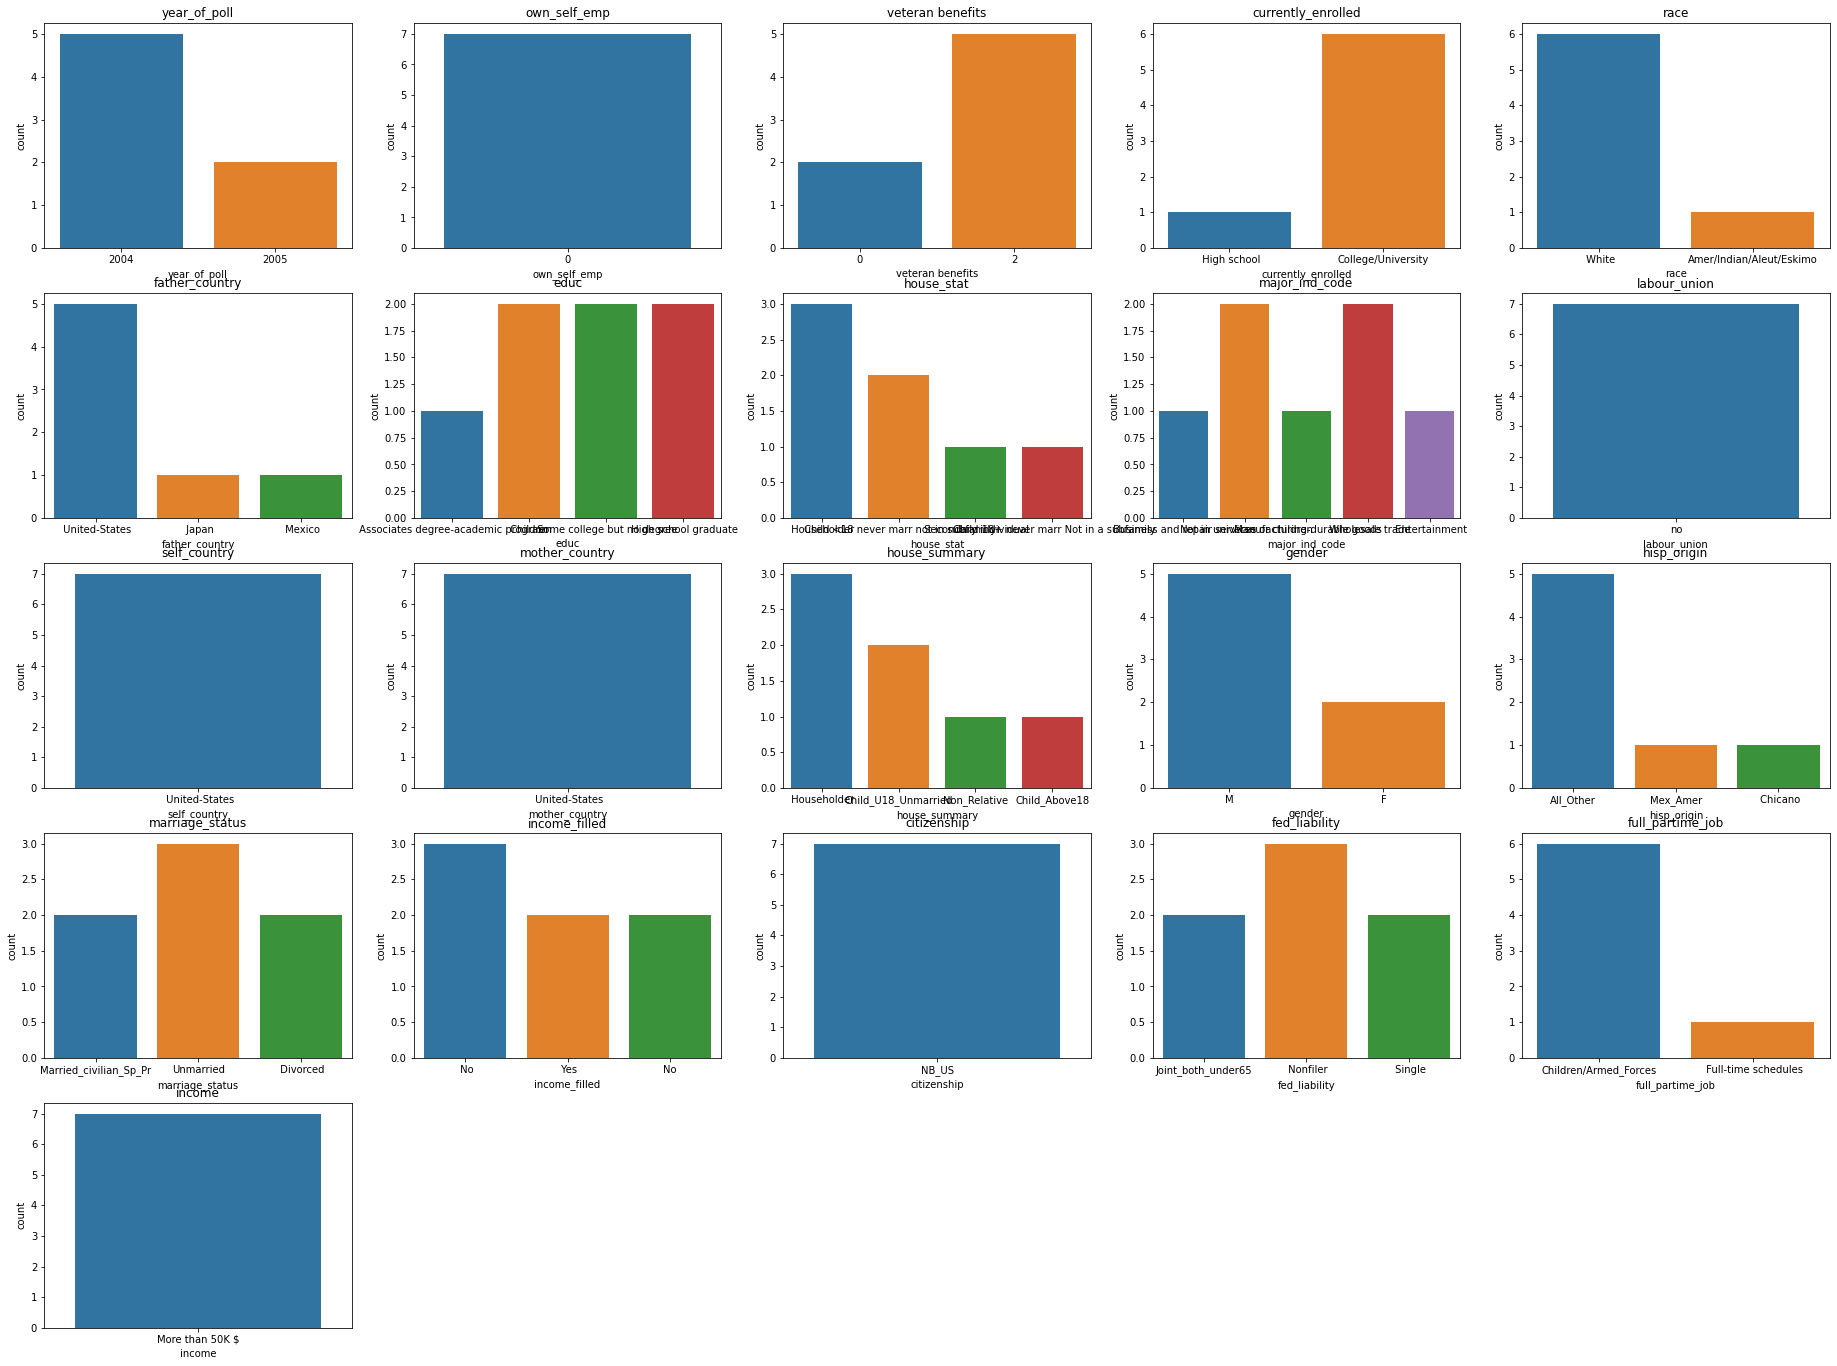

In [682]:
plt.figure(figsize=(32,24))
for i,j in enumerate(object1.columns):
    plt.subplot(5,5,i+1)
    plt.title(j)
    sns.countplot(train[j][:7])

### Distrubution of Numerical features

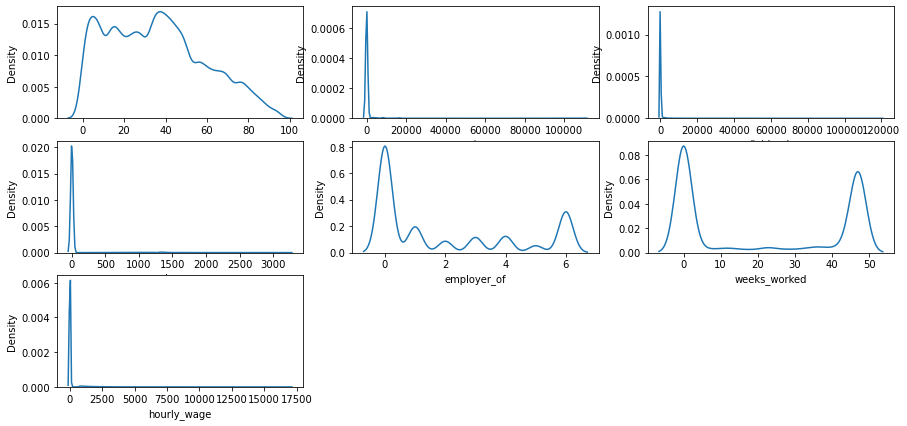

In [683]:
plt.figure(figsize=(15,7))
for i,j in enumerate(number1.columns):
    plt.subplot(3,3,i+1)
    sns.kdeplot(train[j])

### skewness of Numerical features

In [684]:
for i in number1.columns:
    print('skewness of ',i ,'is     :',train[i].skew())

skewness of  age is     : 0.37748077010782644
skewness of  gains is     : 18.866690162759106
skewness of  dividends is     : 28.550385512875646
skewness of  losses is     : 7.751209495969506
skewness of  employer_of is     : 0.7414508980514314
skewness of  weeks_worked is     : 0.20418348819201854
skewness of  hourly_wage is     : 8.404147408964006


### correlation map 

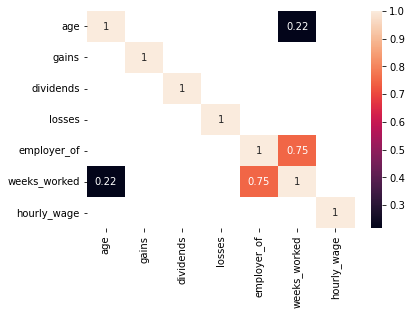

In [685]:
sns.heatmap(train.corr()[np.abs(train.corr()>0.2)],annot=True)
plt.show()

## Inference :
     > Only the columns employer_of and weeks worked are highly correlated among the feartues

### Bi-variate scatterplot

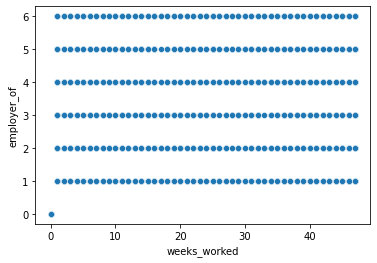

In [686]:
sns.scatterplot(train['weeks_worked'],train['employer_of'])
plt.show()

## Inference :
    We have all category of peoples working around all the weeks 

### box plot for weeks worked 

median : 7.0
mean : 21.013083415587293


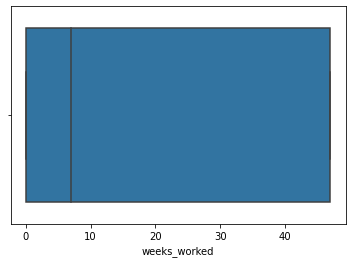

In [687]:
sns.boxplot(train['weeks_worked'])
print('median :',train['weeks_worked'].median())
print('mean :',train['weeks_worked'].mean())
plt.show()

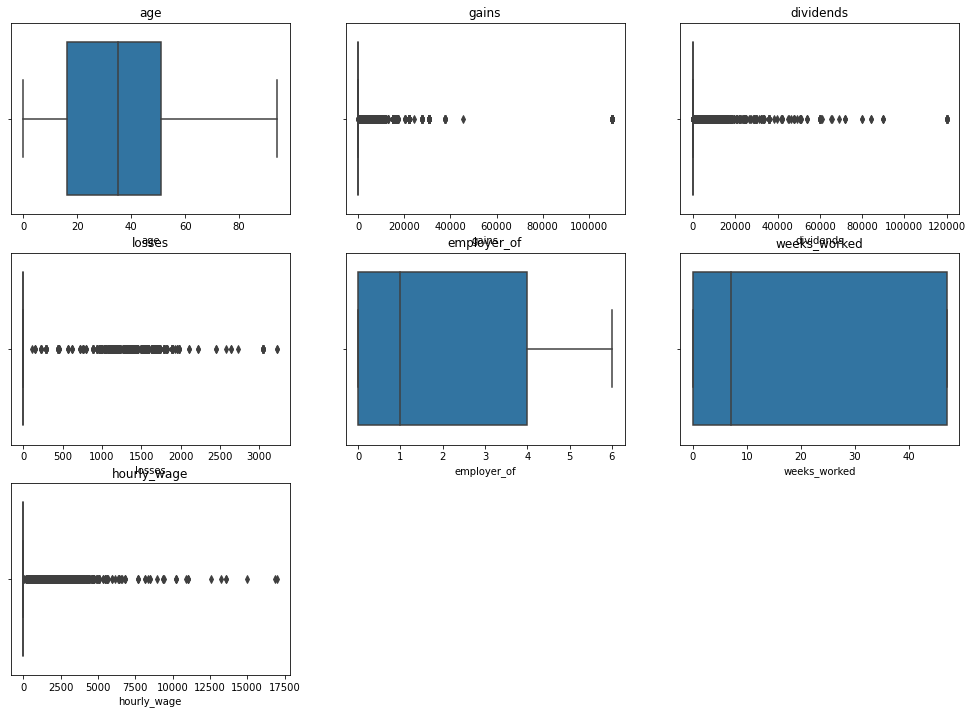

In [688]:
plt.figure(figsize=(17,12))
for i,j in enumerate(number1.columns):
    plt.subplot(3,3,i+1)
    plt.title(j)
    sns.boxplot(train[j])

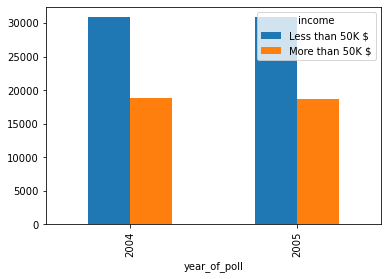

In [689]:
pd.crosstab(train['year_of_poll'],train['income']).plot(kind='bar')
plt.show()

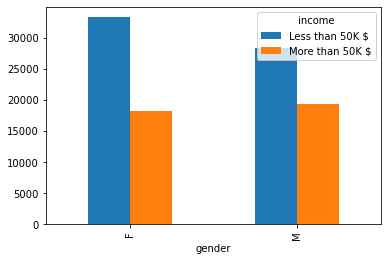

In [690]:
pd.crosstab(train['gender'],train['income']).plot(kind='bar')
plt.show()

## Inference :
    In both the years the earnings are similar in range
    The both male and female salary more than 50k are in same ranges .

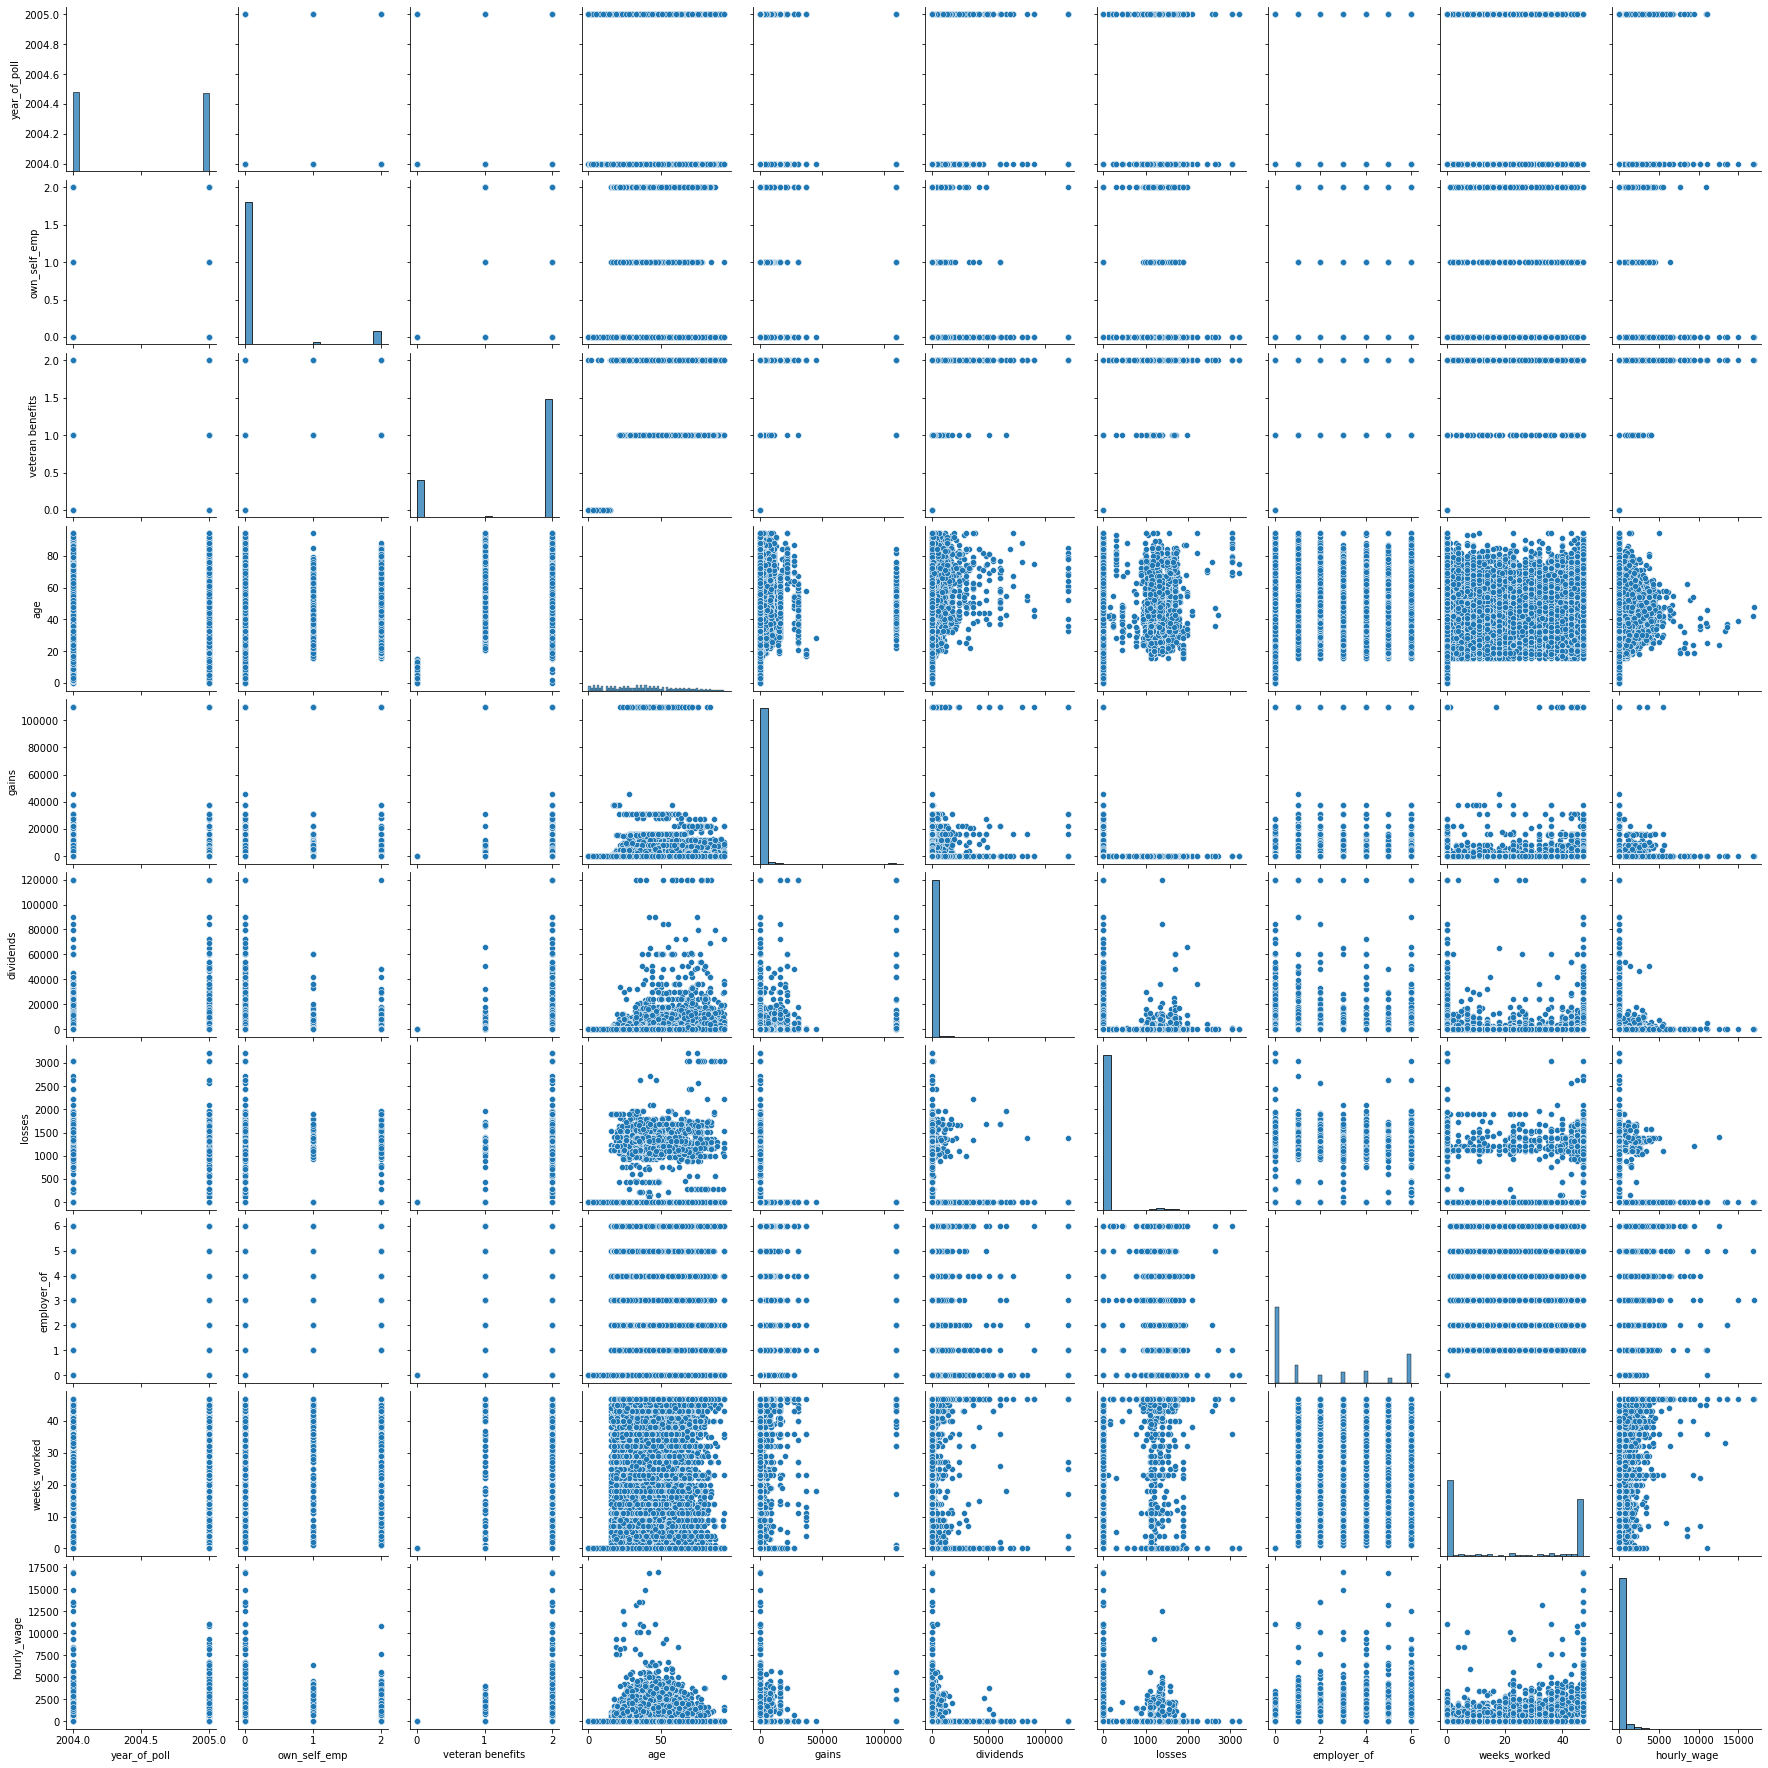

In [691]:
sns.pairplot(train)
plt.show()

## ENCODING PARTS

### Train dataset

In [692]:
for i in object1.columns:
    print(i,' : ')
    print()
    print(object1[i].value_counts())
    print()
    print('**************************************************')

year_of_poll  : 

2004    49714
2005    49572
Name: year_of_poll, dtype: int64

**************************************************
own_self_emp  : 

0    89695
2     8225
1     1366
Name: own_self_emp, dtype: int64

**************************************************
veteran benefits  : 

2    74494
0    23817
1      975
Name: veteran benefits, dtype: int64

**************************************************
currently_enrolled  : 

College/University    69834
 High school          29452
Name: currently_enrolled, dtype: int64

**************************************************
race  : 

 White                      83435
 Black                      10268
Asian/Pacific_Islander       2673
 Other                       1759
Amer/Indian/Aleut/Eskimo     1151
Name: race, dtype: int64

**************************************************
father_country  : 

 United-States                   82088
 Mexico                           5214
 Puerto-Rico                      1423
 Italy                  

### Dummy encoding

In [693]:
tar=object1['income']
object1.drop('income',axis=1,inplace=True)

In [694]:
tar.head(2)

ID
0    More than 50K $
1    More than 50K $
Name: income, dtype: object

In [695]:
target=pd.get_dummies(tar,drop_first=True)

In [696]:
target.value_counts()

More than 50K $
0                  61748
1                  37538
dtype: int64

### Frequency encoder

In [697]:
for i in object1.columns:
    object1[i]=object1[i].map(object1[i].value_counts(normalize=True))

In [698]:
object1.head(2)

,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,labour_union,self_country,mother_country,house_summary,gender,hisp_origin,marriage_status,income_filled,citizenship,fed_liability,full_partime_job
ID,,,,,,,,,,,,,,,,,,,,
0,0.500715,0.9034,0.750297,0.296638,0.84035,0.826783,0.021634,0.266332,0.027829,0.900953,0.900902,0.830741,0.375421,0.480652,0.860977,0.419294,0.534768,0.900923,0.338447,0.621679
1,0.499285,0.9034,0.239883,0.703362,0.84035,0.002065,0.239933,0.254427,0.502558,0.900953,0.900902,0.830741,0.254970,0.480652,0.042121,0.437554,0.534768,0.900923,0.378704,0.621679


### train transformation 

In [699]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
ss = StandardScaler()
pt = PowerTransformer()

In [700]:
train1=pt.fit_transform(number1)

In [701]:
numb=pd.DataFrame(data=train1,columns=number1.columns)
numb.head(1)

,age,gains,dividends,losses,employer_of,weeks_worked,hourly_wage
0,0.393284,-0.194302,-0.340674,-0.138851,0.100166,1.068402,-0.24631


In [702]:
numb.shape

(99286, 7)

### test transformation

In [776]:
tst1=pt.fit_transform(nutes)

In [777]:
nutes1=pd.DataFrame(data=tst1,columns=nutes.columns)

In [778]:
nutes1.head(2)

,ID,year_of_poll,age,gains,dividends,losses,employer_of,weeks_worked,hourly_wage
0,-1.865060,0.996150,-0.044332,-0.196211,-0.345109,-0.14277,1.357058,1.068191,-0.247052
1,-1.864984,-1.003865,0.690157,-0.196211,2.921592,-0.14277,1.357058,1.068191,-0.247052


In [706]:
df_train=pd.concat([numb,object1,target],axis=1)
df_train.head(3)

,age,gains,dividends,losses,employer_of,weeks_worked,hourly_wage,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,labour_union,self_country,mother_country,house_summary,gender,hisp_origin,marriage_status,income_filled,citizenship,fed_liability,full_partime_job,More than 50K $
0,0.393284,-0.194302,-0.340674,-0.138851,0.100166,1.068402,-0.24631,0.500715,0.9034,0.750297,0.296638,0.84035,0.826783,0.021634,0.266332,0.027829,0.900953,0.900902,0.830741,0.375421,0.480652,0.860977,0.419294,0.534768,0.900923,0.338447,0.621679,1.0
1,-1.131624,-0.194302,-0.340674,-0.138851,-0.977584,-1.020188,-0.24631,0.499285,0.9034,0.239883,0.703362,0.84035,0.002065,0.239933,0.254427,0.502558,0.900953,0.900902,0.830741,0.254970,0.480652,0.042121,0.437554,0.534768,0.900923,0.378704,0.621679,1.0
2,0.540361,-0.194302,-0.340674,-0.138851,1.356532,1.068402,-0.24631,0.500715,0.9034,0.750297,0.703362,0.84035,0.826783,0.139415,0.030921,0.046311,0.900953,0.900902,0.830741,0.038706,0.480652,0.860977,0.064329,0.156709,0.900923,0.186763,0.621679,1.0


In [707]:
numb.shape

(99286, 7)

In [708]:
object1.shape

(99286, 20)

In [709]:
df_train.shape

(104683, 28)

In [710]:
df=df_train.dropna()
df.head()

,age,gains,dividends,losses,employer_of,weeks_worked,hourly_wage,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,labour_union,self_country,mother_country,house_summary,gender,hisp_origin,marriage_status,income_filled,citizenship,fed_liability,full_partime_job,More than 50K $
0,0.393284,-0.194302,-0.340674,-0.138851,0.100166,1.068402,-0.24631,0.500715,0.9034,0.750297,0.296638,0.840350,0.826783,0.021634,0.266332,0.027829,0.900953,0.900902,0.830741,0.375421,0.480652,0.860977,0.419294,0.534768,0.900923,0.338447,0.621679,1.0
1,-1.131624,-0.194302,-0.340674,-0.138851,-0.977584,-1.020188,-0.24631,0.499285,0.9034,0.239883,0.703362,0.840350,0.002065,0.239933,0.254427,0.502558,0.900953,0.900902,0.830741,0.254970,0.480652,0.042121,0.437554,0.534768,0.900923,0.378704,0.621679,1.0
2,0.540361,-0.194302,-0.340674,-0.138851,1.356532,1.068402,-0.24631,0.500715,0.9034,0.750297,0.703362,0.840350,0.826783,0.139415,0.030921,0.046311,0.900953,0.900902,0.830741,0.038706,0.480652,0.860977,0.064329,0.156709,0.900923,0.186763,0.621679,1.0
3,0.121004,-0.194302,-0.340674,-0.138851,0.588327,1.068402,-0.24631,0.500715,0.9034,0.750297,0.703362,0.011593,0.826783,0.243982,0.266332,0.017827,0.900953,0.900902,0.830741,0.375421,0.480652,0.860977,0.419294,0.308523,0.900923,0.338447,0.621679,1.0
4,1.049468,-0.194302,-0.340674,-0.138851,0.883371,1.068402,-0.24631,0.500715,0.9034,0.750297,0.703362,0.840350,0.826783,0.243982,0.266332,0.017827,0.900953,0.900902,0.830741,0.375421,0.519348,0.860977,0.064329,0.308523,0.900923,0.186763,0.621679,1.0


In [711]:
df.shape

(93889, 28)

### test dataset

In [780]:
nutes=test.select_dtypes(include=[np.number])
obtes=test.select_dtypes(include=[np.object])

In [781]:
for i in obtes.columns:
    obtes[i]=obtes[i].map(obtes[i].value_counts(normalize=True))

In [782]:
obtes.head(2)

,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,labour_union,self_country,mother_country,house_summary,gender,hisp_origin,marriage_status,income_filled,citizenship,fed_liability,full_partime_job
0,0.904903,0.758864,0.70374,0.840824,0.828198,0.142544,0.268762,0.034743,0.898347,0.901816,0.834141,0.37947,0.480613,0.864063,0.426713,0.539131,0.901816,0.346436,0.210601
1,0.904903,0.758864,0.70374,0.840824,0.828198,0.100913,0.110632,0.024642,0.898347,0.901816,0.834141,0.37947,0.519387,0.864063,0.429595,0.309525,0.901816,0.190552,0.616576


In [783]:
df1=pd.concat([nutes,obtes],axis=1)
df1.head(2)

,ID,year_of_poll,age,gains,dividends,losses,employer_of,weeks_worked,hourly_wage,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,labour_union,self_country,mother_country,house_summary,gender,hisp_origin,marriage_status,income_filled,citizenship,fed_liability,full_partime_job
0,105000,2005,32.0,0.0,0.0,0.0,6,47,0.0,0.904903,0.758864,0.70374,0.840824,0.828198,0.142544,0.268762,0.034743,0.898347,0.901816,0.834141,0.37947,0.480613,0.864063,0.426713,0.539131,0.901816,0.346436,0.210601
1,105001,2004,51.0,0.0,120.0,0.0,6,47,0.0,0.904903,0.758864,0.70374,0.840824,0.828198,0.100913,0.110632,0.024642,0.898347,0.901816,0.834141,0.37947,0.519387,0.864063,0.429595,0.309525,0.901816,0.190552,0.616576


In [784]:
df1.shape

(39202, 28)

In [717]:
df.head(3)

,age,gains,dividends,losses,employer_of,weeks_worked,hourly_wage,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,labour_union,self_country,mother_country,house_summary,gender,hisp_origin,marriage_status,income_filled,citizenship,fed_liability,full_partime_job,More than 50K $
0,0.393284,-0.194302,-0.340674,-0.138851,0.100166,1.068402,-0.24631,0.500715,0.9034,0.750297,0.296638,0.84035,0.826783,0.021634,0.266332,0.027829,0.900953,0.900902,0.830741,0.375421,0.480652,0.860977,0.419294,0.534768,0.900923,0.338447,0.621679,1.0
1,-1.131624,-0.194302,-0.340674,-0.138851,-0.977584,-1.020188,-0.24631,0.499285,0.9034,0.239883,0.703362,0.84035,0.002065,0.239933,0.254427,0.502558,0.900953,0.900902,0.830741,0.254970,0.480652,0.042121,0.437554,0.534768,0.900923,0.378704,0.621679,1.0
2,0.540361,-0.194302,-0.340674,-0.138851,1.356532,1.068402,-0.24631,0.500715,0.9034,0.750297,0.703362,0.84035,0.826783,0.139415,0.030921,0.046311,0.900953,0.900902,0.830741,0.038706,0.480652,0.860977,0.064329,0.156709,0.900923,0.186763,0.621679,1.0


## MODEL BUILDING 

### Base model 

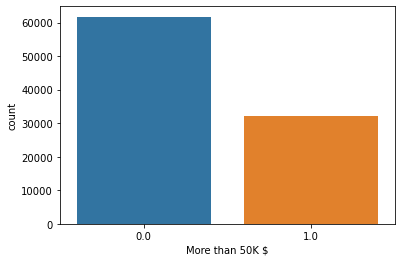

In [718]:
sns.countplot(df['More than 50K $'])
plt.show()

In [719]:
df['More than 50K $'].value_counts(normalize=True) * 100

0.0    65.767023
1.0    34.232977
Name: More than 50K $, dtype: float64

## Inference :
    Our dataset is imbalanced data set so it is prrefered to do smoting to get better accuracy reg the models .

In [720]:
from sklearn.linear_model import LogisticRegression
from scipy import stats
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import r2_score , classification_report , accuracy_score ,roc_curve , roc_curve , cohen_kappa_score,confusion_matrix,roc_auc_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier

In [721]:
x=df.drop('More than 50K $',axis=1)
y=df['More than 50K $']
xc = sm.add_constant(x)
base_model = sm.Logit(y,xc).fit()
print(base_model.summary())

Optimization terminated successfully.
         Current function value: 0.636222
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:        More than 50K $   No. Observations:                93889
Model:                          Logit   Df Residuals:                    93861
Method:                           MLE   Df Model:                           27
Date:                Fri, 09 Sep 2022   Pseudo R-squ.:                0.009877
Time:                        20:33:46   Log-Likelihood:                -59734.
converged:                       True   LL-Null:                       -60330.
Covariance Type:            nonrobust   LLR p-value:                4.663e-234
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.0240      9.155      0.658      0.511     -11.920      23.968
age  

In [722]:
lr = LogisticRegression()

In [723]:
model1 = lr.fit(x,y)
# base model 

In [724]:
y_pred=model1.predict(x)

### model evaluating

In [725]:
# before smote
print('accuracy          :',accuracy_score(y,y_pred))
print('precision_score   :',precision_score(y,y_pred))
print('recall_score      :',recall_score(y,y_pred))
print('cohen_kappa_score :',cohen_kappa_score(y,y_pred))
print('f1_score          :',f1_score(y,y_pred))
print('roc_auc_score     :',roc_auc_score(y,y_pred))

accuracy          : 0.6576702276091981
precision_score   : 0.5
recall_score      : 3.1112908745838646e-05
cohen_kappa_score : 1.9621932586311175e-05
f1_score          : 6.222194568024142e-05
roc_auc_score     : 0.5000074590261161


In [726]:
print(r2_score(y,y_pred))

-0.5205188832026946


In [727]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

         0.0       0.66      1.00      0.79     61748
         1.0       0.50      0.00      0.00     32141

    accuracy                           0.66     93889
   macro avg       0.58      0.50      0.40     93889
weighted avg       0.60      0.66      0.52     93889



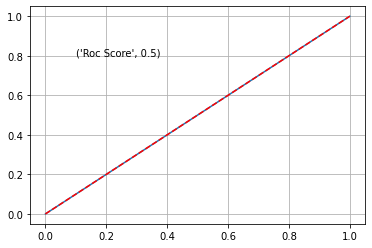

In [728]:
fpr,tpr,threshold = roc_curve(y,y_pred)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.text(x = 0.1,y = 0.8,s = ("Roc Score",round(roc_auc_score(y,y_pred),2)))
plt.grid()

### smoted model

In [729]:
smote  = SMOTE(random_state=1)
x_sm , y_sm = smote.fit_resample(x,y)

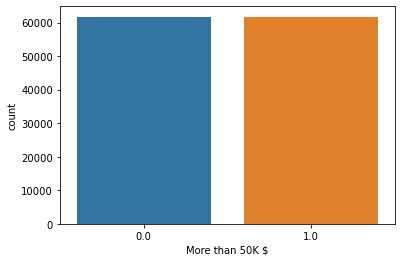

In [730]:
sns.countplot(y_sm)
plt.show()

### base model after smote

In [731]:
smote_model = lr.fit(x_sm,y_sm)
# smote model .

In [732]:
y_sm_pred = smote_model.predict(x_sm)

In [733]:
# After smote
print('accuracy          :',accuracy_score(y_sm,y_sm_pred))
print('precision_score   :',precision_score(y_sm,y_sm_pred))
print('recall_score      :',recall_score(y_sm,y_sm_pred))
print('cohen_kappa_score :',cohen_kappa_score(y_sm,y_sm_pred))
print('f1_score          :',f1_score(y_sm,y_sm_pred))
print('roc_auc_score     :',roc_auc_score(y_sm,y_sm_pred))
print('r2 score          :',r2_score(y_sm,y_sm_pred))

accuracy          : 0.5504550754680314
precision_score   : 0.5559104857958114
recall_score      : 0.5016680702208979
cohen_kappa_score : 0.1009101509360627
f1_score          : 0.5273982514833448
roc_auc_score     : 0.5504550754680313
r2 score          : -0.7981796981278746


In [734]:
print(classification_report(y_sm,y_sm_pred))

              precision    recall  f1-score   support

         0.0       0.55      0.60      0.57     61748
         1.0       0.56      0.50      0.53     61748

    accuracy                           0.55    123496
   macro avg       0.55      0.55      0.55    123496
weighted avg       0.55      0.55      0.55    123496



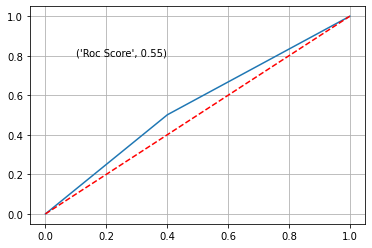

In [735]:
fpr,tpr,threshold = roc_curve(y_sm,y_sm_pred)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.text(x = 0.1,y = 0.8,s = ("Roc Score",round(roc_auc_score(y_sm,y_sm_pred),2)))
plt.grid()

### random forest model 

In [736]:
random_model = RandomForestClassifier(n_estimators=50,random_state=1)
random_forest = random_model.fit(x_sm,y_sm)

In [737]:
y_random =random_forest.predict(x_sm)

In [738]:
print('accuracy          :',accuracy_score(y_sm,y_random))
print('precision_score   :',precision_score(y_sm,y_random))
print('recall_score      :',recall_score(y_sm,y_random))
print('cohen_kappa_score :',cohen_kappa_score(y_sm,y_random))
print('f1_score          :',f1_score(y_sm,y_random))
print('roc_auc_score     :',roc_auc_score(y_sm,y_random))
print('r2 score          :',r2_score(y_sm,y_random))

accuracy          : 0.9800398393470234
precision_score   : 0.9841404654961209
recall_score      : 0.9758048843687245
cohen_kappa_score : 0.9600796786940468
f1_score          : 0.9799549494604506
roc_auc_score     : 0.9800398393470234
r2 score          : 0.9201593573880935


In [739]:
print(classification_report(y_sm,y_random))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     61748
         1.0       0.98      0.98      0.98     61748

    accuracy                           0.98    123496
   macro avg       0.98      0.98      0.98    123496
weighted avg       0.98      0.98      0.98    123496



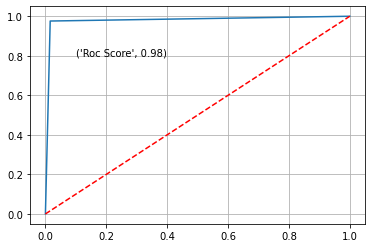

In [740]:
fpr,tpr,threshold = roc_curve(y_sm,y_random)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.text(x = 0.1,y = 0.8,s = ("Roc Score",round(roc_auc_score(y_sm,y_random),2)))
plt.grid()

### Decission tree classifier

In [741]:
decision_t = DecisionTreeClassifier(random_state=12)
decision_model = decision_t.fit(x_sm,y_sm)

In [742]:
y_decision=decision_model.predict(x_sm)

In [743]:
print('accuracy          :',accuracy_score(y_sm,y_decision))
print('precision_score   :',precision_score(y_sm,y_decision))
print('recall_score      :',recall_score(y_sm,y_decision))
print('cohen_kappa_score :',cohen_kappa_score(y_sm,y_decision))
print('f1_score          :',f1_score(y_sm,y_decision))
print('roc_auc_score     :',roc_auc_score(y_sm,y_decision))
print('r2 score          :',r2_score(y_sm,y_decision))

accuracy          : 0.9802584699099566
precision_score   : 0.9899547301985924
recall_score      : 0.9703634125801646
cohen_kappa_score : 0.9605169398199132
f1_score          : 0.9800611740844334
roc_auc_score     : 0.9802584699099566
r2 score          : 0.9210338796398264


In [744]:
print(classification_report(y_sm,y_decision))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     61748
         1.0       0.99      0.97      0.98     61748

    accuracy                           0.98    123496
   macro avg       0.98      0.98      0.98    123496
weighted avg       0.98      0.98      0.98    123496



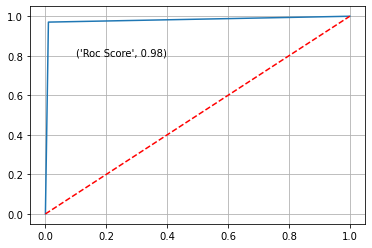

In [745]:
fpr,tpr,threshold = roc_curve(y_sm,y_decision)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.text(x = 0.1,y = 0.8,s = ("Roc Score",round(roc_auc_score(y_sm,y_decision),2)))
plt.grid()

### final test data

In [785]:
tst=df1.drop('ID',axis=1)
tst.head()

,year_of_poll,age,gains,dividends,losses,employer_of,weeks_worked,hourly_wage,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,labour_union,self_country,mother_country,house_summary,gender,hisp_origin,marriage_status,income_filled,citizenship,fed_liability,full_partime_job
0,2005,32.0,0.0,0.0,0.0,6,47,0.0,0.904903,0.758864,0.70374,0.840824,0.828198,0.142544,0.268762,0.034743,0.898347,0.901816,0.834141,0.379470,0.480613,0.864063,0.426713,0.539131,0.901816,0.346436,0.210601
1,2004,51.0,0.0,120.0,0.0,6,47,0.0,0.904903,0.758864,0.70374,0.840824,0.828198,0.100913,0.110632,0.024642,0.898347,0.901816,0.834141,0.379470,0.519387,0.864063,0.429595,0.309525,0.901816,0.190552,0.616576
2,2004,70.0,0.0,0.0,0.0,0,0,0.0,0.904903,0.758864,0.70374,0.840824,0.828198,0.039182,0.000969,0.491888,0.898347,0.901816,0.834141,0.000638,0.519387,0.864063,0.051630,0.309525,0.901816,0.366946,0.616576
3,2004,25.0,0.0,0.0,0.0,2,47,0.0,0.081552,0.758864,0.70374,0.840824,0.828198,0.244426,0.030662,0.034743,0.898347,0.901816,0.834141,0.038212,0.480613,0.864063,0.429595,0.539131,0.901816,0.190552,0.616576
4,2004,65.0,0.0,0.0,0.0,6,47,0.0,0.904903,0.758864,0.70374,0.840824,0.001403,0.005969,0.268762,0.023851,0.101653,0.000969,0.001148,0.379470,0.519387,0.864063,0.051630,0.539131,0.023953,0.190552,0.616576


In [786]:
y_final = random_forest.predict(tst)

In [787]:
y_final

array([1., 1., 1., ..., 1., 1., 1.])

In [788]:
y_label = pd.DataFrame(y_final,columns=['Target'])
y_label.head()

,Target
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [789]:
ids=df1['ID']
ids.head()

0    105000
1    105001
2    105002
3    105003
4    105004
Name: ID, dtype: int64

In [790]:
final_test = pd.concat([ids,y_label],axis=1)
final_test

,ID,Target
0,105000.0,1.0
1,105001.0,1.0
2,105002.0,1.0
3,105003.0,1.0
4,105004.0,1.0
...,...,...
39135,NaN,1.0
39152,NaN,1.0
39155,NaN,1.0
39163,NaN,1.0
